# Preparing the dataset for hippocampus segmentation

In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import shutil
import matplotlib.image as mpimg

## Loading NIFTI images using NiBabel

In [2]:
path = '.\data\TrainingSet'
image_path = os.path.join(path, 'images' )  # concatenate path and the file 'images' 
label_path = os.path.join(path, 'labels')  
images = sorted(glob.glob(os.path.join(image_path, '*'))) # return a list with complete path of 'nii' files. * match any string
labels = sorted(glob.glob(os.path.join(image_path, '*')))
len(images)

263

In [3]:
outliers=[]
for num, img in enumerate(images):
    head_tail = os.path.split(img) #split image path
    img_name = head_tail[1]
    if not os.path.exists(os.path.join(label_path, img_name)): # determine whether the image file exists
        outliers.append(img_name)
        print(f"This image '{img_name}' has no corresponding label.")

This image 'hippocampus_118.nii.gz' has no corresponding label.


In [4]:
# Load an image and a segmentation mask into variables called image and label
img_number = '001'
img_name = 'hippocampus_{}.nii.gz'.format(img_number)
image = nib.load(os.path.join(image_path, img_name))
image_slice = image.get_fdata()
label = nib.load(os.path.join(label_path, img_name))
label_slice=label.get_fdata()
print(f"Image shape: {image.shape}")
print(f"Label shape: {label.shape}")



Image shape: (35, 51, 35)
Label shape: (35, 51, 35)


In [5]:
# using matplotlib, visualize a few slices from the dataset, along with their labels. 
def plot_image(image, label, axial_count, coronal_count, sagittal_count):
    fig, axes = plt.subplots(2,3, figsize=(15,15))
    plt.rcParams["figure.figsize"] = (10,10)

    axial_img = image[:,:,axial_count]
    axial_label = label[:,:,axial_count]
    coronal_img = image[:, coronal_count,:] 
    coronal_label = label[:, coronal_count,:] 
    sagittal_img = image[sagittal_count,:,:]
    sagittal_label = label[sagittal_count,:,:]

    img_plot = axes[0,0].imshow(axial_img, cmap='gray')
    axes[0,0].axis('off')
    axes[0,0].set_title("Image Slice:{}".format(axial_count))
    label_plot = axes[1,0].imshow(axial_label, cmap='gray')
    axes[1,0].axis('off')
    axes[1,0].set_title("Label Slice:{}".format(axial_count))

    img_plot = axes[0,1].imshow(coronal_img, cmap='gray')
    axes[0,1].axis('off')
    axes[0,1].set_title("Image Slice:{}".format(coronal_count))
    label_plot = axes[1,1].imshow(coronal_label, cmap='gray')
    axes[1,1].axis('off')
    axes[1,1].set_title("Label Slice:{}".format(coronal_count))

    img_plot = axes[0,2].imshow(sagittal_img, cmap='gray')
    axes[0,2].axis('off')
    axes[0,2].set_title("Image Slice:{}".format(sagittal_count))
    label_plot = axes[1,2].imshow(sagittal_label, cmap='gray')
    axes[1,2].axis('off')
    axes[1,2].set_title("Image Slice:{}".format(sagittal_count))

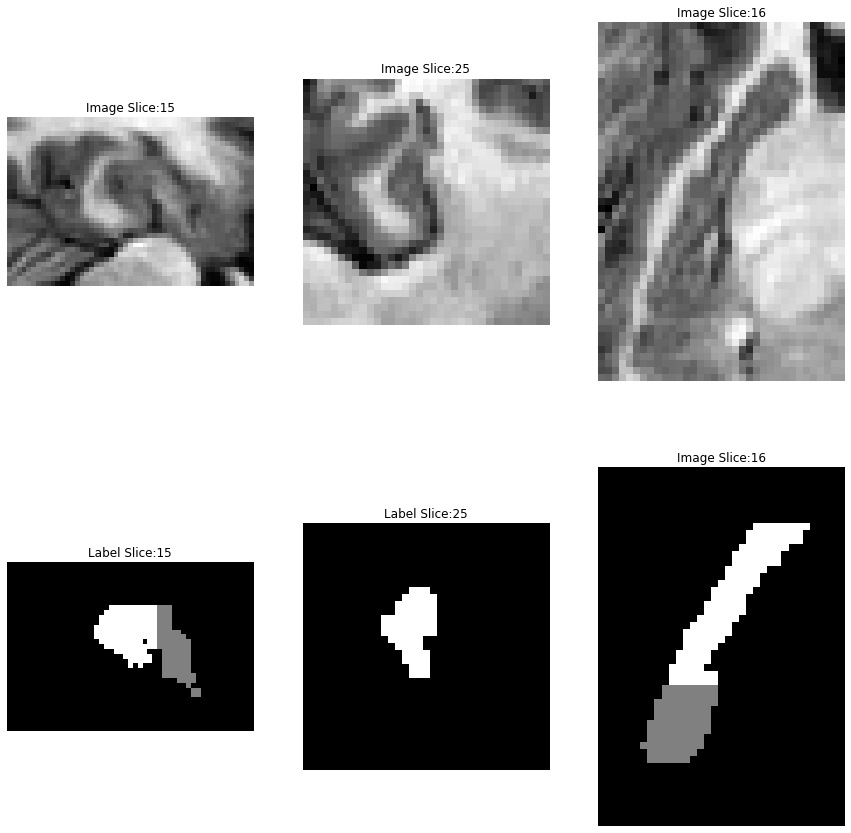

In [6]:
plot_image(image=image_slice, label=label_slice, axial_count=15, coronal_count=25, sagittal_count=16)

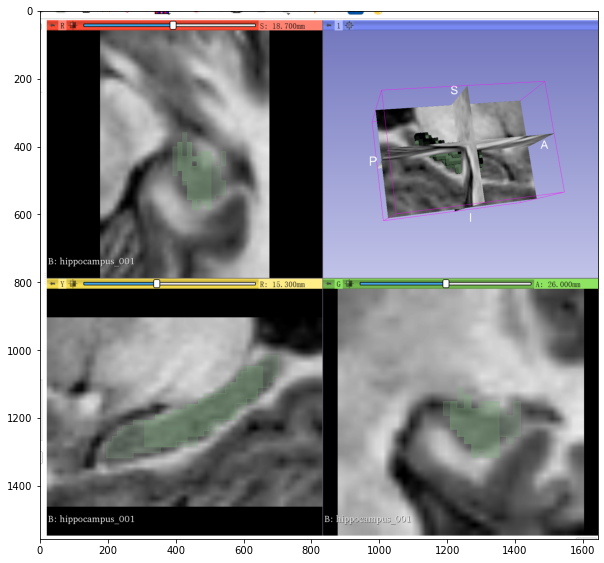

In [7]:
# renderings of medical volume slices
img=mpimg.imread('001.png')
imgplot = plt.imshow(img)
plt.show()

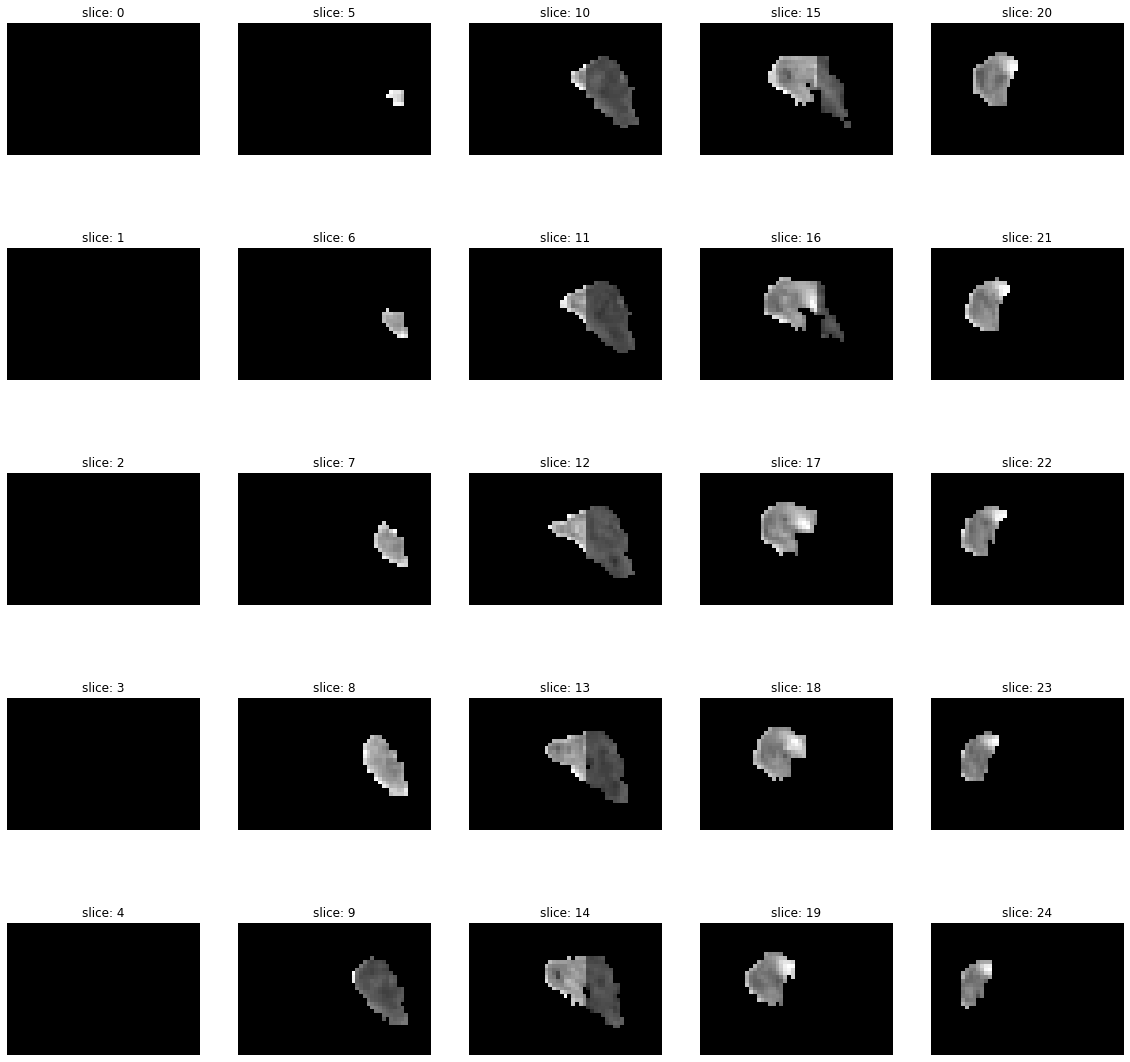

In [8]:
result = np.multiply(image_slice, label_slice)

fig, ax = plt.subplots(5, 5, figsize=[20,20])
for i in range(25):
    x = i // 5
    y = i % 5
    ax[y, x].set_title("slice: {}".format(i))
    ax[y, x].imshow(result[:,:,i], cmap='gray')
    ax[y, x].axis("off")
plt.show()

## Looking at single image data

In [9]:
image.header_class

nibabel.nifti1.Nifti1Header

In [10]:
print(image)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (35, 51, 35)
affine: 
[[1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 35 51 35  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b'none'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
q

Further down we will be inspecting .header attribute that provides access to NIFTI metadata.  Resource: https://brainder.org/2012/09/23/the-nifti-file-format/

In [11]:
# bits per pixel are used
print(f" The number of bits per pixel: {image.header['bitpix']}")

The number of bits per pixel: 8


In [12]:
# units of measurement
print(f" The number of units: {image.header['xyzt_units']}")

The number of units: 10


In [13]:
# grid spacings
print(f" Grid spacing: {image.header['pixdim']}")

Grid spacing: [1. 1. 1. 1. 1. 0. 0. 0.]


In [14]:
# dimensions 
print(f" Dimension: {image.header['dim']}")

# dim[1]=35,dim[2]=51,dim[3]=35 represent sagittal, coronal, and axial slices respectively as the visualization of 3D slicer.

Dimension: [ 3 35 51 35  1  1  1  1]


In [15]:
# Compute the volume (in mm³) of a hippocampus using one of the labels you've loaded. 
label_slices=[]
for f in os.listdir(label_path):
    label_slice = [f,nib.load(os.path.join(label_path, f))]
    label_slices.append(label_slice)
print(np.shape(label_slices))


(262, 2)


In [16]:
def vol(label):
    volume = 0
    for i in range(label.shape[0]):
        for j in range(label.shape[1]):
            for k in range(label.shape[2]):
                if (label[i][j][k]) != 0:
                    volume+=1
    return volume

In [17]:
vs =[]
for i in range(len(label_slices)):
    v = vol(label_slices[i][1].get_fdata())
    vs.append(v)
    # if (v > 4500 or v < 2200):
    #     outliers.append(label_slices[i][0])
    #     print(f"Outlier: {label_slices[i][0]}")  

In [18]:
print(f'Minimum volume: {np.min(vs)}')
print(f'Mean volume: {np.mean(vs)}')
print(f'Maximum volume: {np.max(vs)}')

Minimum volume: 2382
Mean volume: 3362.259541984733
Maximum volume: 20702


## Plotting some charts

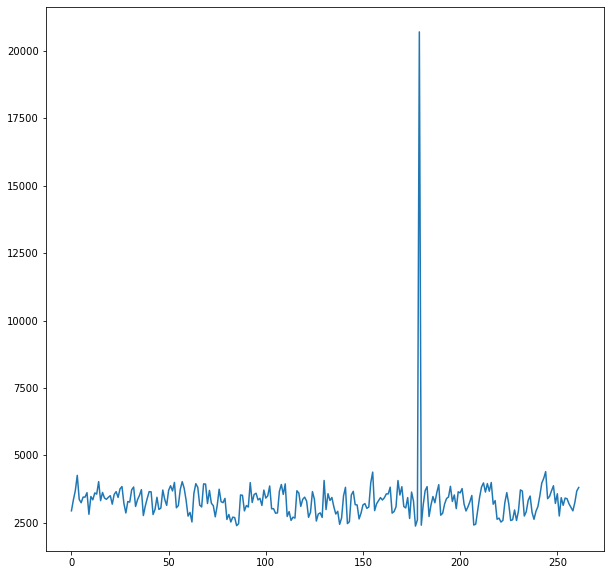

In [19]:
# Plot a histogram of all volumes 
plt.plot(vs)

As the figure above shows, there is a volume that is significantly larger than others. It's obvously an outlier. The reason of this outlier may be that the area of hippocampus of label slices was manually marked wrong or the image shape and pixel spacing of this label slices are different from others. Let's try to find out the reasons.

In [21]:
label_slice=[]
for num, val in enumerate(vs):
    if val>4500 or val<2200:
        label_slice.append(label_slices[num])

In [22]:
print(label_slice[0])

['hippocampus_281.nii.gz', <nibabel.nifti1.Nifti1Image object at 0x0000014237103448>]


In [23]:
label_slc = label_slice[0][1].get_fdata()
image_outlier = nib.load(os.path.join(image_path, label_slice[0][0]))
image_slc = image_outlier.get_fdata()

In [24]:
print(f" Image shape of this outlier: {image_slc.shape}")
print(f" Label shape of this outlier: {label_slc.shape}")
# It's obviously that the image shape and label shape of this outlier is not equal and boch much bigger than other slices.

Image shape of this outlier: (512, 512, 31)
 Label shape of this outlier: (512, 512, 94)


In [25]:
print(f" Grid spacing: {image_outlier.header['pixdim']}")
# and the grid spacing is also much larger than the normal slices. 

Grid spacing: [1.       0.785156 0.785156 7.5      0.       0.       0.       0.      ]


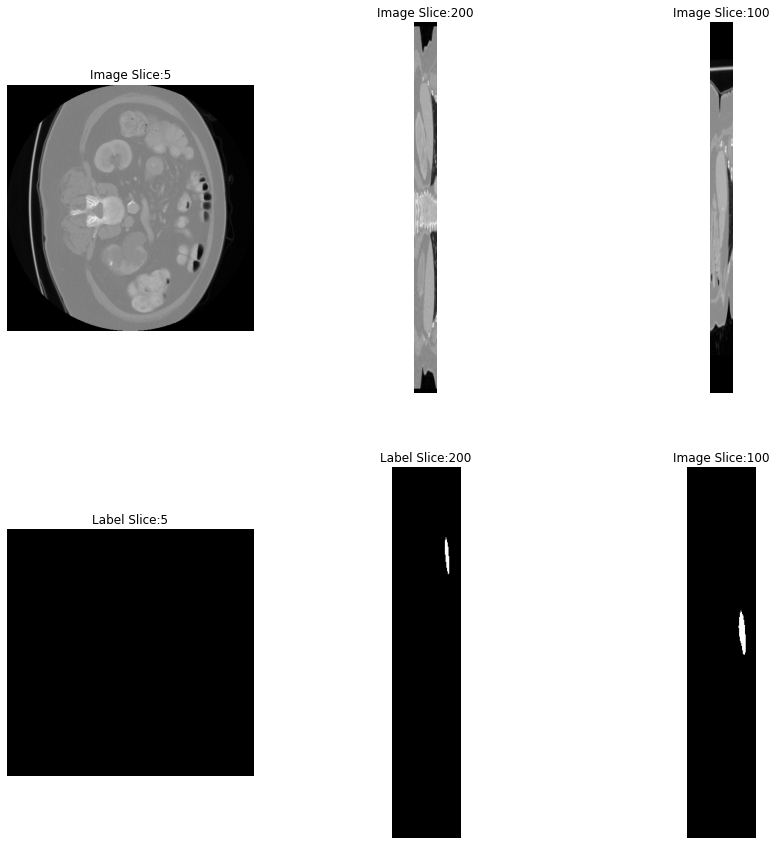

In [26]:
plot_image(image=image_slc, label=label_slc, axial_count=5, coronal_count=200, sagittal_count=100)

In [27]:
# So we should regard the abnormal volume as outlier, which should be remove.
for num, val in enumerate(vs):
    if (val>4500 or val<2200):
        outliers.append(label_slices[num][0])
        print(f"Outlier: {label_slices[num][0]}") 



Outlier: hippocampus_281.nii.gz


In [28]:
clean_vs=[v for v in vs if (2200 <= v <= 4500)]

(array([13., 26., 29., 35., 41., 45., 38., 25.,  6.,  3.]),
 array([2382. , 2583.9, 2785.8, 2987.7, 3189.6, 3391.5, 3593.4, 3795.3,
        3997.2, 4199.1, 4401. ]),
 <a list of 10 Patch objects>)

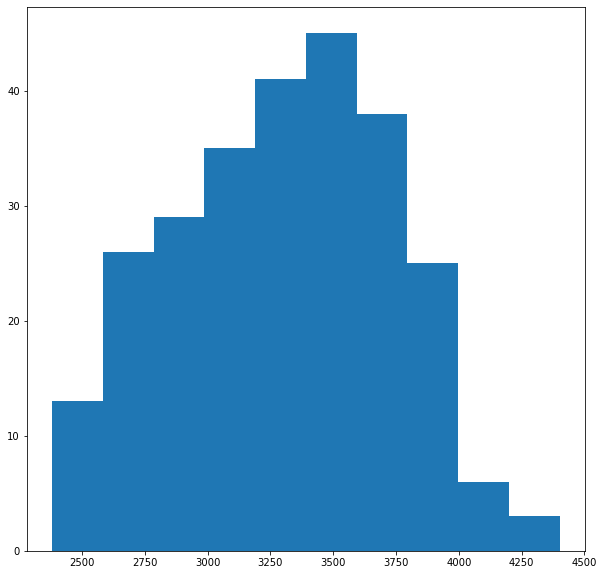

In [29]:
plt.hist(clean_vs)

In [30]:
# Copy the clean dataset to the output folder inside section1/out.
out_images_path = 'out/images/'
out_labels_path = 'out/labels/'
os.makedirs(os.path.dirname(out_images_path),exist_ok=True) #create path
os.makedirs(os.path.dirname(out_labels_path),exist_ok=True)


In [31]:
# as the outlier above shows, the inconsistency of image shape and label shape may cause abnomalities. 
# Therefore we should check if there are any other slices having the same situation.
for img in images:
    img_slice = nib.load(img).get_fdata()
    head_tail = os.path.split(img) 
    img_name = head_tail[1]
    if img_name not in outliers:
       label_slice = nib.load(os.path.join(label_path,img_name)).get_fdata()
       if img_slice.shape != label_slice.shape:
          outliers.append(img_name)
          print(f"Outlier: {img_name}")


Outlier: hippocampus_010.nii.gz


In [32]:
print(f"Outliers: {outliers}")

Outliers: ['hippocampus_118.nii.gz', 'hippocampus_281.nii.gz', 'hippocampus_010.nii.gz']


In [33]:
for image_file in images:
    file_name = os.path.split(image_file)[1]
    if file_name not in outliers:
        shutil.copy(image_file, out_images_path)
        label_file = os.path.join(label_path, file_name)
        shutil.copy(label_file, out_labels_path)

print(f"Number of images in clean dataset: {len(os.listdir(out_images_path))}")
print(f"Number of labels in clean dataset: {len(os.listdir(out_labels_path))}")

Number of images in clean dataset: 260
Number of labels in clean dataset: 260
